In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import HalfspaceIntersection
from scipy.spatial import ConvexHull
import itertools

## Duality in linear programming
The previous section contained a long-winded description of linear programming. To avoid doing that again this section will be a little shorter. 

A linear programming problem is defined:

$$
\begin{align*}
\text{maximise} \quad & c^Tx \\
\text{subject to} \quad & Ax\leq b \\
\text{} \quad & x\geq 0 \\
\end{align*}
$$


### Getting an upper bound on the objective function

Say I have a set of contstraints / inequalities. One of the things I can do is sum up the coefficients of those constraints for each variable (and the limit), and arrive at an entirely new equation. For instance, if $x_1 + x_2 < 2$ and $x_1 < 1$, then taking them both: $2x_1 + x_2 < 3$. At the same time, I can also multiply constraints by a positive constant ($x_1<2$ and $\frac{1}{2}x_1<1$ are the same). What this means is we can do a weighted sum of constraints and arrive at a new constraint.

If we denote these positive weights as $y$, then the new constraint coefficients are $A^Ty$, and the limit is $b^Ty$. This means:

$$
\begin{align*}
(A^Ty)^Tx &\leq b^Ty \\
y^TAx &\leq b^Ty \\
x^TA^Ty &\leq b^Ty \\
\end{align*}
$$

Notice that if we now introduce the constraint that $A^Ty\geq c$ we get:

$$x^Tc \leq b^Ty$$

So therefore $b^Ty$ is an upper bound on the problem, given the constraints that $y>0$ and $A^Ty\geq c$.

### The dual problem

Given this we have an alternative linear programming problem, which instead of maximising the objective function, instead minimises this upper bound:

$$
\begin{align*}
\text{minimise} \quad & y^Tb \\
\text{subject to} \quad & Ay\geq c \\
\text{} \quad & y\geq 0 \\
\end{align*}
$$

The upper bound constraint is called weak duality. There is also a proof that the optimal value of the dual problem matches the value for the original (primal) problem, but it's much more involved. This is shown in the example problem below:

### Example

Imagine I have the following problem:

$$
\begin{align*}
\text{maximise} \quad & 2x_1 + x_2 \\
\text{subject to} \quad & x_1+x_2\leq 3 \\
\quad & x_1 \leq 2 \\
\quad & x_1,x_2\geq 0 \\
\end{align*}
$$

This looks like:

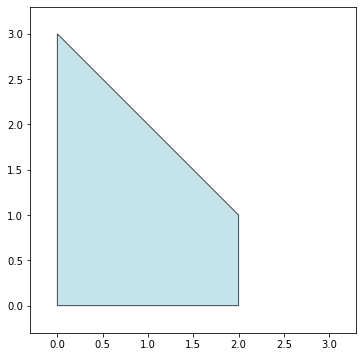

In [5]:
def make_2d_polyhedron_plot(vertices):
    plt.figure(figsize=(6,6))
    hull = ConvexHull(vertices)
    plt.fill(vertices[hull.vertices, 0], vertices[hull.vertices, 1], 'lightblue', edgecolor='black', alpha=0.7)
    min_axes = np.min(vertices)
    max_axes = np.max(vertices)
    plt.xlim(min_axes-(max_axes-min_axes)*0.1,max_axes+(max_axes-min_axes)*0.1)
    plt.ylim(min_axes-(max_axes-min_axes)*0.1,max_axes+(max_axes-min_axes)*0.1)
    plt.gca().set_aspect('equal')

vertices = np.array([[0,0],[2,0],[2,1],[0,3]])
make_2d_polyhedron_plot(vertices)
plt.show()

We can easily see that the optimal value is at [2,1].

When we make the dual problem we get:

$$
\begin{align*}
\text{minimise} \quad & 3y_1 + 2y_2 \\
\text{subject to} \quad & y_1+y_2\geq 2 \\
\quad & y_1  \geq 1 \\
\quad & y_1,y_2\geq 0 \\
\end{align*}
$$